In [28]:
# get / import basic's library

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(4032, 3024, 3)
(800, 1500, 3)


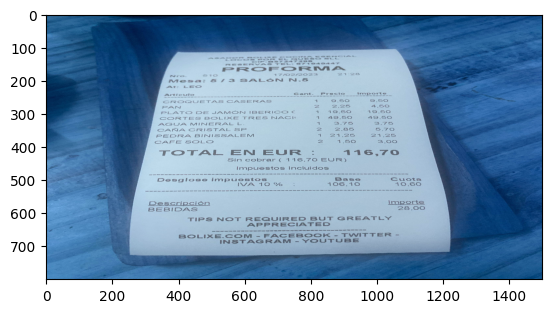

In [29]:
im_path= "./bill1.jpg"
# read image from path
img = cv2.imread(im_path)
print(img.shape)

#img resize
img = cv2.resize(img,(1500,800))

# BGR format : BGR->RGB
print(img.shape)

plt.imshow(img)  #how our image would show
plt.show()

In [30]:
# 1 Remove the Noise
# 2 Edge Detection
# 3 Contour Extraction
# 4 Best Contour Selection
# 5 Project to the screen

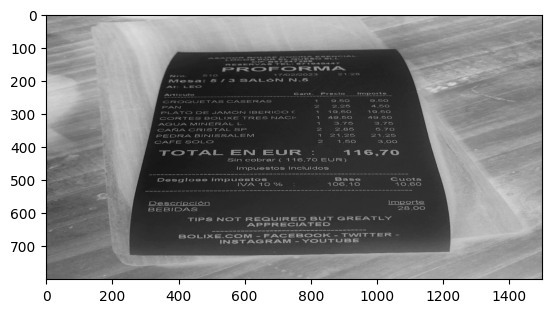

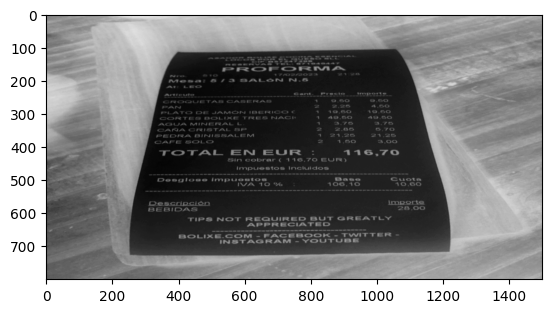

In [31]:
#1 remove the noise

originalimg = img.copy()
gray = cv2.cvtColor(originalimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="binary" )
plt.show()

##1.1 Image Blurring

blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred, cmap="binary")
plt.show()

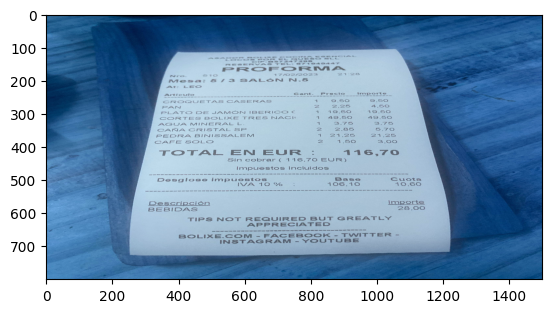

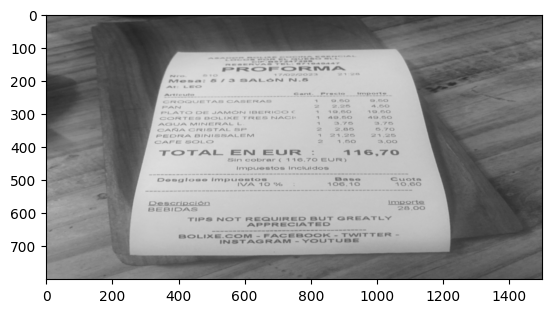

In [32]:
# converting the above blurred image to BGR (color format)

regenerated = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(originalimg)
plt.show()

plt.imshow(regenerated)
plt.show()

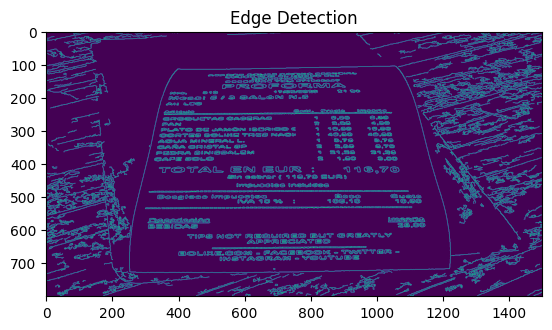

In [33]:
#2 Edge detection

edge = cv2.Canny(blurred, 0 , 50)
originalimg_edge = edge.copy()

plt.imshow(originalimg_edge)
plt.title("Edge Detection")
plt.show()

In [34]:
#3 Contours Extraction

contours, _ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted( contours, reverse=True , key= cv2.contourArea )

2514


In [35]:
# select the best contour region

for c in contours :
    
    p = cv2.arcLength(c,True)
    
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    
    if len(approx) == 4 :
        target = approx
        break
    
print(target.shape)

(4, 1, 2)


In [36]:
## reorder target contor

def reorder(h):
    h = h.reshape((4, 2))
    print(h)
    
    hnew = np.zeros((4, 2), dtype=np.float32)
    
    add = h.sum(axis=1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h, axis=1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    
    return hnew

In [37]:
reorder = reorder(target)
print("*************")
print(reorder)

[[1075  125]
 [ 398  114]
 [ 253  726]
 [1220  717]]
*************
[[ 253.  726.]
 [1220.  717.]
 [ 253.  726.]
 [1220.  717.]]


In [38]:
## project to a fixed screen

input_representation = reorder

output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [39]:
M = cv2.getPerspectiveTransform(input_representation, output_map)

ans = cv2.warpPerspective(originalimg, M, (800, 800))

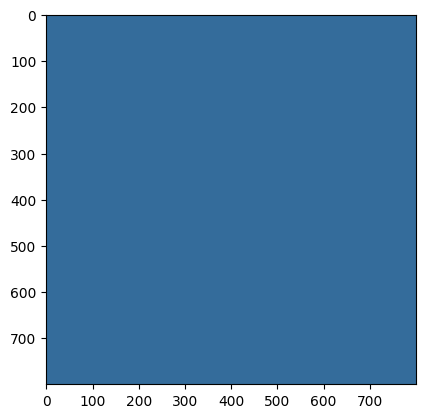

In [40]:
plt.imshow(ans)  # not working 
plt.show()

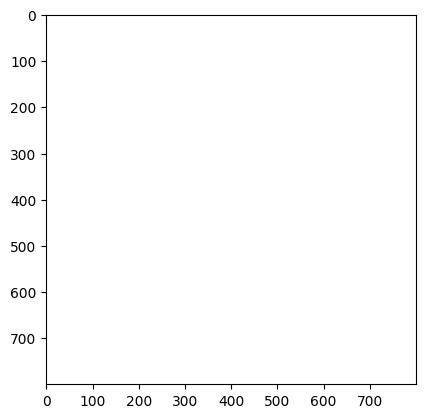

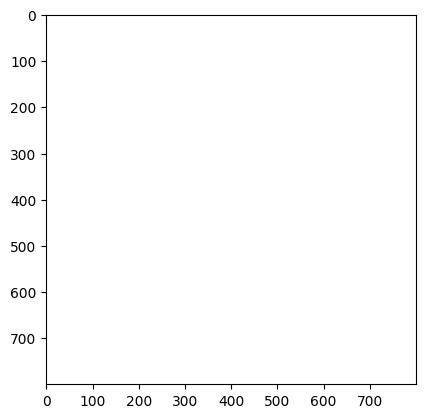

In [41]:
result = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)

blur_result = cv2.GaussianBlur(result, (3,3),0)

plt.imshow(result, cmap = "binary")
plt.show()

plt.imshow(blur_result, cmap = "binary")
plt.show()